In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from word2number import w2n
import statsmodels.api as smi
import seaborn as sns
%matplotlib inline

In [4]:
sal=pd.read_csv(r"E:\todo\UPX\Machine Learning\Linear Regerssion\csv_files\salary.csv")
sal.rename(columns = {'experience':'exp','test_score(outof10)':'tscore','Interview_score(outof10)':'iscore','salary($)':'salary'},inplace=True)

In [5]:
def Wordtonum(value):
    if isinstance(value, (str)):
        try:
            return w2n.word_to_num(value) 
        except:
            return value 
    else:
        return value

In [6]:
sal

,exp,tscore,iscore,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
sal['exp']=sal.apply(lambda row :Wordtonum(row['exp']),axis=1)
sal['exp'].fillna(0,inplace=True)
sal['tscore'].fillna(round(sal['tscore'].mean()),inplace=True)
sal["exp"]= sal["exp"].astype(int) 
sal["tscore"]= sal["tscore"].astype(int) 

In [8]:
df_output=sal['salary']
output_variable='sal'
df_input=sal[['exp', 'tscore', 'iscore']]
feature_columns=['exp', 'tscore', 'iscore']
sal

,exp,tscore,iscore,salary
0,0,8,9,50000
1,0,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,8,7,72000
7,11,7,8,80000


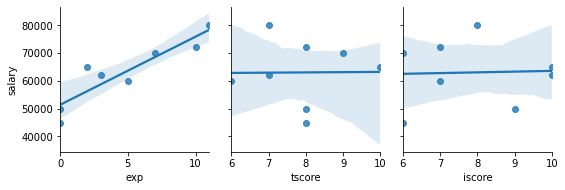

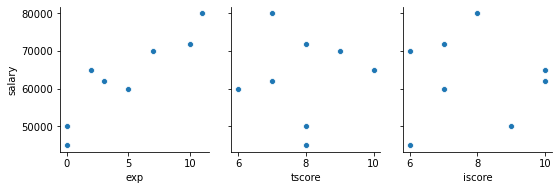

In [9]:
###########Ploting the Variables with Output_variable here salary is output column so plotting the relation 
sns.pairplot(sal, x_vars=feature_columns, y_vars='salary', kind='reg')
sns.pairplot(sal, x_vars=feature_columns, y_vars='salary', diag_kind='auto')

In [10]:
###########Running the Linear Regeression initilising Variables first 
# Statfication based on which model need to be split ####################
reg =linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, random_state=123,test_size=.6)
print("The No of Rows Columns in X_Train is which is based on test_size given earlier",X_train.shape)
print("The No of Rows Columns in X_test  is which is based on test_size  given earlier",X_test.shape)
print("The No of Rows Columns in y_train is which is based on test_size given earlier",y_train.shape)
print("The No of Rows Columns in y_test  is which is based on test_size  given earlier",y_test.shape)

The No of Rows Columns in X_Train is which is based on test_size given earlier (3, 3)
The No of Rows Columns in X_test  is which is based on test_size  given earlier (5, 3)
The No of Rows Columns in y_train is which is based on test_size given earlier (3,)
The No of Rows Columns in y_test  is which is based on test_size  given earlier (5,)


In [11]:
### Function to Calculate the Values Based upon Variables#############3
def Testing_Input(feature_columns):
    df_input=sal[feature_columns]
    df_output=sal.salary
    X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, test_size=.6,random_state=123)
    reg =linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [12]:
#########This gives mean Root Mean square error based upon one or more features passed to function
print (Testing_Input(['exp', 'tscore', 'iscore']))
print (Testing_Input(['exp', 'tscore']))

5612.236554012704
11692.563849845597


In [13]:
##############Train the Model ##############################
reg =linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("reg.intercept_=> %10.10f" %(reg.intercept_))
#print("reg.coef_=",reg.coef_)
print(list(zip(feature_columns, reg.coef_)))


##########Test the Model on test data Set ###################

y_pred=reg.predict(X_test)
#print("Test Data Set Values of Coefficents:\n")
#print("reg.intercept_=>",reg.intercept_)
#print(list(zip(feature_columns, reg.coef_)))


################Rmse Value for the Data Set After Training the Data set Training a
print("\n##############################################################################")
rmse_val=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE Value is =>",rmse_val)

print("\n##############################################################################")
####Just Converting the Dataframe to array for result comparision
#df = pd.DataFrame({'Actual': y_test, 'Predicted': actual_result})
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error':y_test -y_pred})


reg.intercept_=> 32438.5964912281
[('exp', 1789.4736842105256), ('tscore', 1526.3157894736833), ('iscore', 1350.8771929824559)]

##############################################################################
RMSE Value is => 5612.236554012704

##############################################################################


In [14]:
df

,Actual,Predicted,Error
0,50000,56807.017544,-6807.017544
1,45000,52754.385965,-7754.385965
3,65000,64789.473684,210.526316
7,80000,73614.035088,6385.964912
4,70000,66807.017544,3192.982456


In [15]:
############Pridicting one or more values based upon  Trained Model Pridict Values.#################
print("##############################################################################\n")
print("Values for Coeffiencet given here is 12 10 10 for Exp tscore and iscore")
print("\nSalary Pridction on Test Data Set with 12,10,10 Values=>",reg.predict([[8,10,10]]))

##############################################################################

Values for Coeffiencet given here is 12 10 10 for Exp tscore and iscore

Salary Pridction on Test Data Set with 12,10,10 Values=> [75526.31578947]


In [16]:
###########Calculating Null RMSE and Compare with RMSE
X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, random_state=123,test_size=.6)
y_null = np.zeros_like(y_test, dtype=int)
y_null.fill(y_test.mean())
N_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_null))
print("Value of RMSE = ",rmse_val)
print("Value of Null RMSE = ",N_RMSE)
#if N_RMSE < rmse_val:print("Model is Not Doing Well Null RMSE Should be Greater")
#    else:print("Model is Doing Well Null RMSE is Greater than RMSE")

Value of RMSE =  5612.236554012704
Value of Null RMSE =  12884.098726725126


In [17]:
#################Calculate the Error Percentages###########
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error    : 4870.175438596494
Mean Squared Error     : 31497199.13819639
Root Mean Squared Error: 5612.236554012704


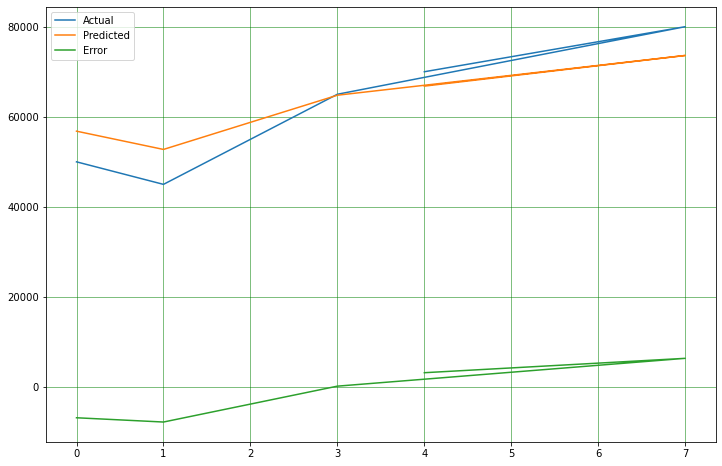

NameError: name 'trip_data' is not defined

In [18]:
############Printing the Correlation and Cofficients
df1 = df.head(5)
df1.plot(kind='line',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.show()
trip_data.hist(column="Trip_distance")
sns.boxplot(data=df)